In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
ab_data = pd.read_csv('data/ab_data.csv')

In [4]:
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [5]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [6]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')

In [7]:
daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


In [10]:
daily_data['conversion'] = daily_data.converted/daily_data.users_count*100
daily_data[(daily_data.timestamp=='2017-01-5')&(daily_data.group=='A')]

,timestamp,group,users_count,converted,conversion
6,2017-01-05,A,6419,791,12.322792


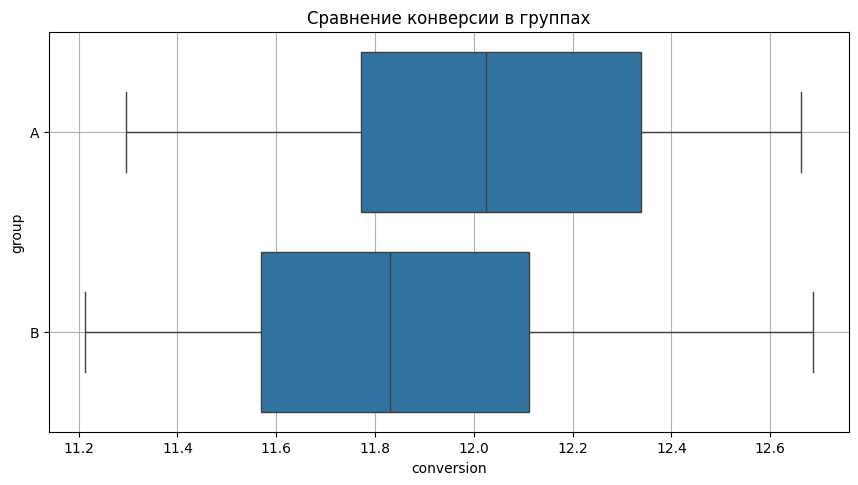

In [11]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax) 
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid(True);

In [12]:
conversion_piv = daily_data.groupby('group')['conversion'].agg(
    ['mean', 'median']
)
display(conversion_piv)

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


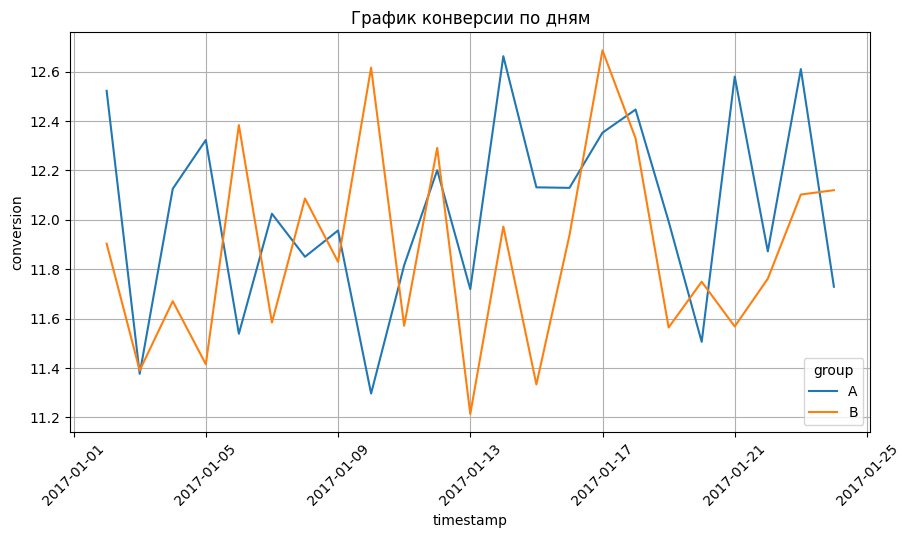

In [13]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid(True);

In [14]:
# выделяем данные группы А
daily_data_a = daily_data[daily_data['group'] == 'A']
# считаем кумулятивное количество посетителей
daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()
# выводим время, количество посетителей и кумулятивное количество посетителей
display(daily_data_a[['timestamp', 'users_count', 'cum_users_count']].head())

C:\Users\anzel\AppData\Local\Temp\ipykernel_20284\906787284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()


,timestamp,users_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


In [15]:
# вычисляем кумулятивную сумму количества посетителей
daily_data['cum_users_count'] = daily_data.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
# вычисляем кумулятивную конверсию
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count'] * 100
display(daily_data.head())

,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.389728,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806


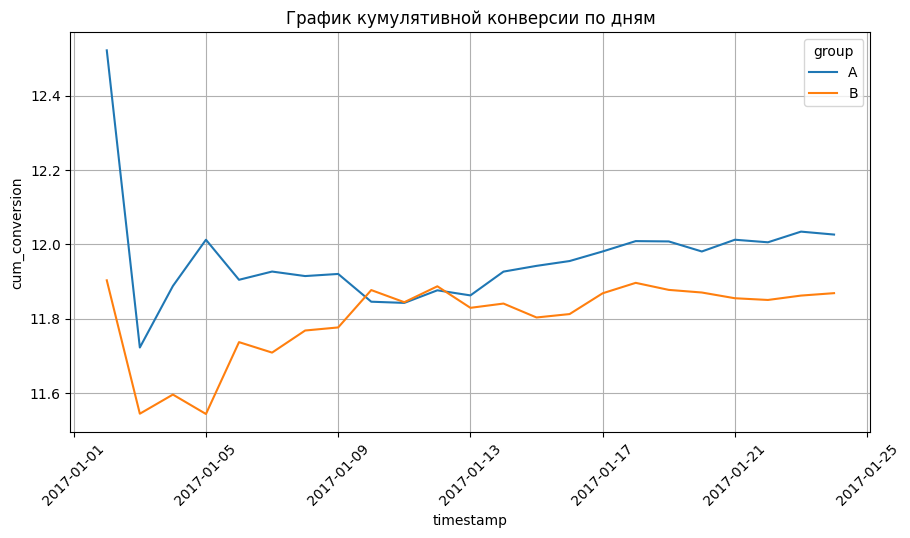

In [16]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_data, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

## Practice

In [17]:
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')

In [18]:
sample_a['date'] = pd.to_datetime(sample_a['date'], format='%Y-%m-%d')
sample_b['date'] = pd.to_datetime(sample_b['date'], format='%Y-%m-%d')

In [19]:
data_a = sample_a.groupby('date').agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid': 'users_count'})
data_b = sample_b.groupby('date').agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
}).reset_index().rename(columns={'cid': 'users_count'})
data_a[data_a.date=='2020-11-08']

,date,users_count,transactions,revenue
2,2020-11-08,3354,25,846051


In [23]:
data_a['cum_users_count'] = data_a.users_count.cumsum()
data_a['cum_transactions'] = data_a.transactions.cumsum()
data_a['cum_revenue'] = data_a.revenue.cumsum()
data_a['cum_conversion'] = data_a.cum_transactions/data_a.cum_users_count*100
data_a['cum_cheque'] = data_a.cum_revenue/data_a.cum_transactions*100
print(data_a.cum_conversion.mean().round(2))

data_b['cum_users_count'] = data_b.users_count.cumsum()
data_b['cum_transactions'] = data_b.transactions.cumsum()
data_b['cum_revenue'] = data_b.revenue.cumsum()
data_b['cum_conversion'] = data_b.cum_transactions/data_b.cum_users_count*100
data_b['cum_cheque'] = data_b.cum_revenue/data_b.cum_transactions*100
print(data_b.cum_conversion.mean().round(2))

0.71
0.76


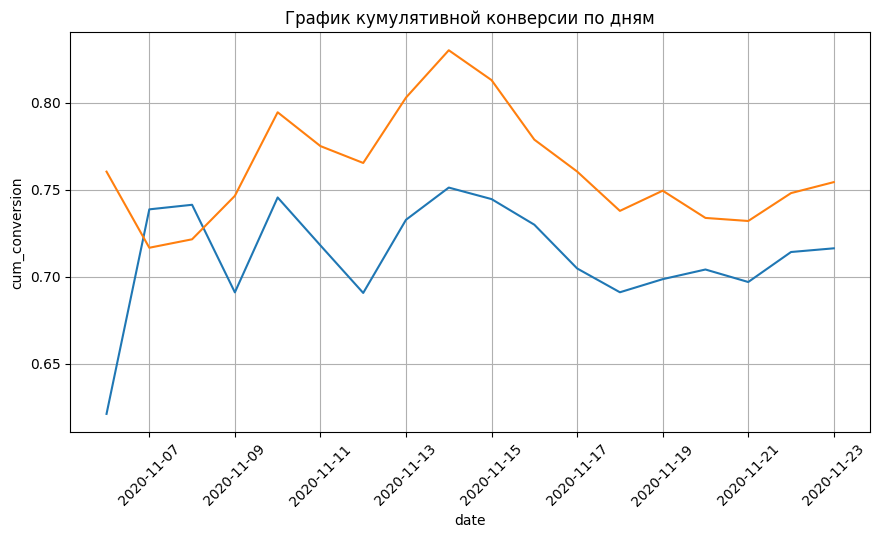

In [28]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=data_a, ax=ax)
sns.lineplot(x='date', y='cum_conversion', data=data_b, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

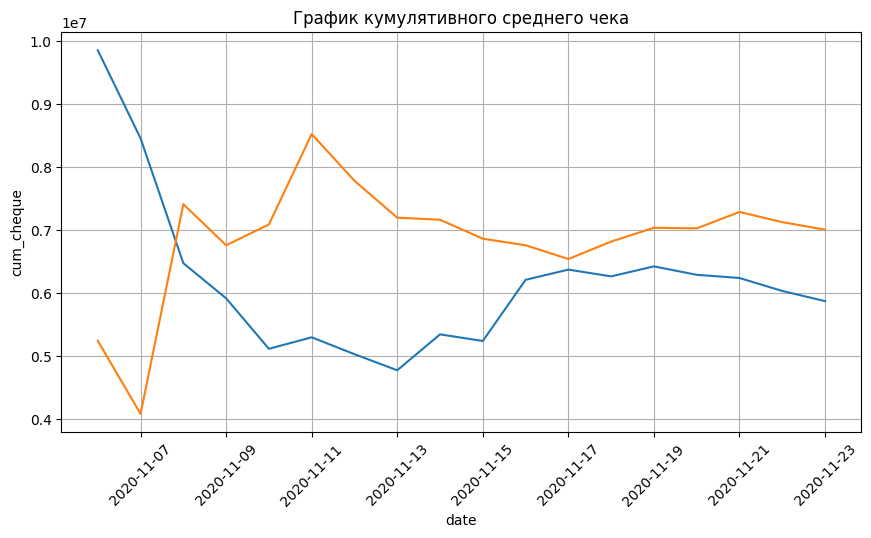

In [29]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_cheque', data=data_a, ax=ax)
sns.lineplot(x='date', y='cum_cheque', data=data_b, ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивного среднего чека')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

## Анализ результатов A/B-тестирования: статистические тесты

In [30]:
converted_piv= ab_data.groupby('group')['converted'].agg(
    ['sum', 'count']
)
display(converted_piv)

,sum,count
group,,
A,17467,145241
B,17238,145241


### z

In [31]:
from statsmodels.stats.proportion import proportions_ztest

In [32]:
alpha = 0.05 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['sum'], #число «успехов»
    nobs=converted_piv['count'], #общее число наблюдений
    alternative='two-sided',
)
# выводим результат на экран
print('p-value: ', round(p_value, 3))
# сравниваем полученное p-value с уровнем значимости
if (p_value <= alpha):
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

# p-value:  0.19
# У нас нет оснований отвергнуть нулевую гипотезу

p-value:  0.19
У нас нет оснований отвергнуть нулевую гипотезу


In [33]:
alpha = 0.05 # уровень значимости
# вычисляем значение p-value для Z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['sum'], # число «успехов»
    nobs=converted_piv['count'], # общее число наблюдений
    alternative='larger' # правосторонняя альтернативная гипотеза
)
# выводим результат на экран
print('p-value: ', round(p_value, 3))
# сравниваем полученное p-value с уровнем значимости
if (p_value <= alpha):
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

p-value:  0.095
У нас нет оснований отвергнуть нулевую гипотезу


### x^2

In [37]:
from statsmodels.stats.proportion import proportions_chisquare

alpha = 0.05 # уровень значимости
# вычисляем значение p-value для Z-теста для пропорций
_, p_value, c = proportions_chisquare(
    count=converted_piv['sum'], #число «успехов»
    nobs=converted_piv['count'] #общее число наблюдений
)
# выводим результат на экран
print('p-value: ', round(p_value, 3))
# сравниваем полученное p-value с уровнем значимости
if (p_value <= alpha):
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

p-value:  0.19
У нас нет оснований отвергнуть нулевую гипотезу


### ПАРАМЕТРИЧЕСКИЕ ТЕСТЫ

In [39]:
time_data = pd.read_excel('data/time_data.xlsx')
display(time_data.head())

,time(A),time(B)
0,435.0,549.2
1,454.5,630.2
2,447.0,437.2
3,480.0,637.2
4,561.0,712.4


In [40]:
time_data[['time(A)', 'time(B)']].agg(['mean', 'median'])

,time(A),time(B)
mean,492.90,595.406667
median,482.25,600.400000


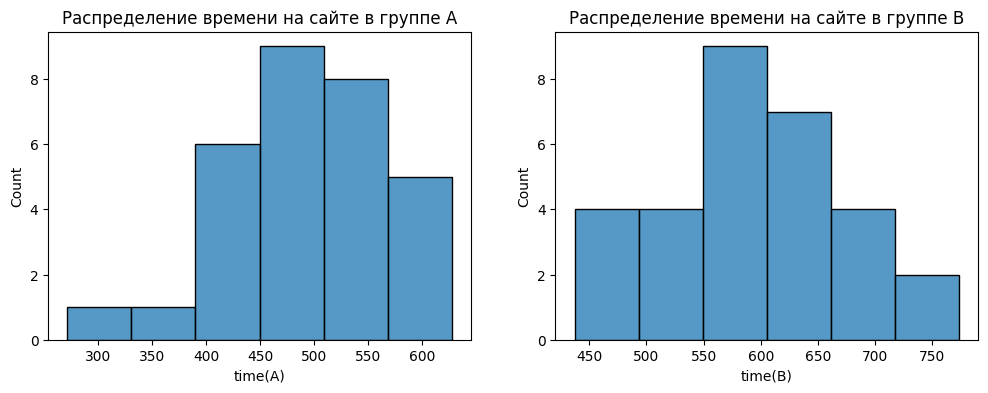

In [41]:
# создаём два графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='time(A)', data=time_data, ax=axes[0])
sns.histplot(x='time(B)', data=time_data, ax=axes[1])
# задаём названия графикам
axes[0].set_title('Распределение времени на сайте в группе А');
axes[1].set_title('Распределение времени на сайте в группе B');

In [42]:
from scipy.stats import shapiro

alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро — Уилка для выборок
shapiro_result_a = shapiro(time_data['time(A)'])
shapiro_result_b = shapiro(time_data['time(B)'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))

# сравниваем полученное p-value для группы А с уровнем значимости
if shapiro_result_a.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе А является нормальным")

# сравниваем полученное p-value для группы B с уровнем значимости
if shapiro_result_b.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе B отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе B является нормальным")

p-value группы А 0.43
p-value группы B 0.12
Принимаем нулевую гипотезу. Распределение в группе А является нормальным
Принимаем нулевую гипотезу. Распределение в группе B является нормальным


In [47]:
from scipy.stats import ttest_ind

alpha = 0.05 #уровень значимости
# вычисляем результат T-теста для выборок
results = ttest_ind(
    a=time_data['time(A)'],
    b=time_data['time(B)'],
    alternative='two-sided'
)
print('p-value:', round(results.pvalue, 2))

# сравниваем полученное p-value с уровнем значимости
if results.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

p-value: 0.0
Отвергаем нулевую гипотезу в пользу альтернативной


### НЕПАРАМЕТРИЧЕСКИЕ ТЕСТЫ

In [48]:
check_data = pd.read_excel('data/check_data.xlsx')
check_data.head()

,date,mean_check_a,mean_check_b
0,2020-11-06,68701.239649,88665.123322
1,2020-11-07,26136.309375,46230.394893
2,2020-11-08,119470.770656,139356.451490
3,2020-11-09,71110.880188,90867.073191
4,2020-11-10,85896.024022,105977.473589


In [49]:
check_data[['mean_check_a', 'mean_check_b']].agg(['mean', 'median'])

,mean_check_a,mean_check_b
mean,76684.763071,96658.897304
median,62883.707793,82854.201467


In [50]:
from scipy.stats import mannwhitneyu

alpha = 0.05 # уровень значимости

# вычисляем результат теста Манна — Уитни для выборок
results = mannwhitneyu(
    x=check_data['mean_check_a'],
    y=check_data['mean_check_b'],
    alternative='two-sided'
)
print('p-value:', round(results.pvalue, 2))

# сравниваем полученное p-value с уровнем значимости
if results.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

p-value: 0.06
У нас нет оснований отвергнуть нулевую гипотезу


In [51]:
alpha = 0.05 # уровень значимости

# вычисляем результат теста Манна — Уитни для выборок
results = mannwhitneyu(
    x=check_data['mean_check_a'],
    y=check_data['mean_check_b'],
    alternative='less' # изменили альтернативную гипотезу
)
print('p-value:', round(results.pvalue, 2))

# сравниваем полученное p-value с уровнем значимости
if results.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

p-value: 0.03
Отвергаем нулевую гипотезу в пользу альтернативной


### Practice

In [52]:
sample_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')

# преобразуем тип столбца date к типу datetime
sample_a['date'] = pd.to_datetime(sample_a['date'])
sample_b['date'] = pd.to_datetime(sample_b['date'])

In [54]:
data_a.head()

,date,users_count,transactions,revenue,cum_users_count,cum_transactions,cum_revenue,cum_conversion,cum_cheque
0,2020-11-06,2576,16,1577279,2576,16,1577279,0.621118,9.857994e+06
1,2020-11-07,2704,23,1721886,5280,39,3299165,0.738636,8.459397e+06
2,2020-11-08,3354,25,846051,8634,64,4145216,0.741256,6.476900e+06
3,2020-11-09,3234,18,708830,11868,82,4854046,0.690934,5.919568e+06
4,2020-11-10,3022,29,826984,14890,111,5681030,0.745467,5.118045e+06


In [56]:
data_a['conversion'] = data_a.transactions/data_a.users_count*100
data_b['conversion'] = data_b.transactions/data_b.users_count*100

In [62]:
data_piv = pd.DataFrame({'transactions':[data_a.transactions.sum(), data_b.transactions.sum()],
                        'users':[data_a.users_count.sum(), data_b.users_count.sum()]})
data_piv

,transactions,users
0,441,61571
1,463,61383


In [70]:
alpha = 0.05 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=data_piv['transactions'], #число «успехов»
    nobs=data_piv['users'], #общее число наблюдений
    alternative='two-sided',
)
# выводим результат на экран
print('p-value: ', round(p_value, 3))
# сравниваем полученное p-value с уровнем значимости
if (p_value <= alpha):
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

p-value:  0.435
У нас нет оснований отвергнуть нулевую гипотезу


In [72]:
daily_sample_a = sample_a.groupby('date')[['transactions', 'revenue']].sum()
daily_sample_a['mean_check'] = daily_sample_a['revenue']/daily_sample_a['transactions']
daily_sample_b = sample_b.groupby('date')[['transactions', 'revenue']].sum()
daily_sample_b['mean_check'] = daily_sample_b['revenue']/daily_sample_a['transactions']

In [78]:
alpha = 0.05

_, p_value = stats.shapiro(daily_sample_a['mean_check'])

if p_value <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))

_, p_value = stats.shapiro(daily_sample_b['mean_check'])

if p_value <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))

p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


In [79]:
# вычисляем результат теста Манна — Уитни для выборок
results = mannwhitneyu(
    x=daily_sample_a['mean_check'],
    y=daily_sample_b['mean_check'],
    alternative='two-sided'
)
print('p-value:', round(results.pvalue, 2))

# сравниваем полученное p-value с уровнем значимости
if results.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

p-value: 0.12
У нас нет оснований отвергнуть нулевую гипотезу


## Анализ результатов A/B-тестирования: доверительные интервалы

In [86]:
n = 36 # размер выборки
x_mean = 16100 # выборочное среднее
sigma = 12000 # истинное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [81]:
from scipy.stats import norm
z_crit = -norm.ppf(alpha/2) # z-критическое
print(z_crit)

1.959963984540054


In [88]:
def z_mean_conf_interval(x_mean, sigma, n, gamma=0.95):  
    alpha = 1 - gamma  # уровень значимости
    z_crit = -norm.ppf(alpha/2)  # z-критическое
    eps = z_crit * sigma/(n ** 0.5) # погрешность
    lower_bound = x_mean - eps  # левая (нижняя) граница
    upper_bound = x_mean + eps  # правая (верхняя) граница
    # возвращаем кортеж из границ интервала
    return lower_bound, upper_bound

# строим доверительный интервал для среднего при известном СКО
lower_bound, upper_bound = z_mean_conf_interval(x_mean, sigma, n)

# выводим результат
print('Доверительный интервал: {}'.format((round(lower_bound), round(upper_bound))))

Доверительный интервал: (12180, 20020)


In [93]:
gamma = 0.9
x_mean = 12.35
sigma = 2.4
n = 64
# строим доверительный интервал
lower, upper = norm.interval(gamma, loc=x_mean, scale=sigma / n**0.5)
print('Доверительный интервал: {}'.format((round(lower, 2), round(upper, 2))))

Доверительный интервал: (11.86, 12.84)


In [103]:
n = 15 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 2000 # выборочное среднее
x_std = 400 # выборочное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [104]:
from scipy.stats import t
t_crit = -t.ppf(alpha/2, k) # t-критическое
print(t_crit)

2.1447866879169273


In [105]:
def t_mean_conf_interval(x_mean, x_std, n, gamma=0.95):  
    alpha = 1 - gamma # уровень значимости
    t_crit = -t.ppf(alpha/2, k) # t-критическое
    eps = t_crit * x_std/(n ** 0.5) # погрешность
    lower_bound = x_mean - eps # левая (нижняя) граница
    upper_bound = x_mean + eps # правая (верхняя) граница
    # возвращаем кортеж из границ интервала
    return lower_bound, upper_bound

# cтроим доверительный интервал для среднего при неизвестном СКО
lower_bound, upper_bound = t_mean_conf_interval(x_mean, x_std, n)

# выводим результат
print('Доверительный интервал: {}'.format((round(lower_bound), round(upper_bound))))

Доверительный интервал: (1778, 2222)


In [97]:
# строим доверительный интервал для среднего при неизвестном СКО
lower, upper = t.interval(gamma, df=k, loc=x_mean, scale=x_std/(n ** 0.5))
print('Доверительный интервал: {}'.format((round(lower), round(upper))))

Доверительный интервал: (1778, 2222)


In [109]:
# строим доверительный интервал для среднего при неизвестном СКО
n = 25
k = n-1
x_mean = 3540
x_std = 1150
gamma = 0.9
lower, upper = t.interval(gamma, df=k, loc=x_mean, scale=x_std/(n ** 0.5))
print('Доверительный интервал: {}'.format((round(lower), round(upper))))

Доверительный интервал: (3146, 3934)


#### ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ ДЛЯ ПРОПОРЦИИ

In [111]:
ab_data = pd.read_csv('data/ab_data.csv')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [112]:
# фильтруем данные группы А
a_data = ab_data[ab_data['group'] == 'A']
# фильтруем данные группы B
b_data = ab_data[ab_data['group'] == 'B']

In [114]:
def proportion_conf_interval(x_p, n, gamma=0.95):  
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z-критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 # погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из границ интервала
    return lower_bound, upper_bound

In [115]:
# строим доверительный интервал для конверсии в группе А
lower_bound_a, upper_bound_a  = proportion_conf_interval(
    x_p=a_data['converted'].mean(), # выборочная пропорция
    n=a_data['user_id'].count() # размер выборки
)

# строим доверительный интервал для конверсии в группе B
lower_bound_b, upper_bound_b  = proportion_conf_interval(
    x_p=b_data['converted'].mean(), # выборочная пропорция
    n=b_data['user_id'].count() # размер выборки
)

# выводим результат
print('Доверительный интервал для конверсии в группе А: {}'.format((round(lower_bound_a * 100, 2), round(upper_bound_a * 100, 2))))
print('Доверительный интервал для конверсии в группе B: {}'.format((round(lower_bound_b * 100, 2), round(upper_bound_b * 100, 2))))

Доверительный интервал для конверсии в группе А: (11.86, 12.19)
Доверительный интервал для конверсии в группе B: (11.7, 12.03)


In [117]:
from statsmodels.stats import proportion

# вычисляем доверительный интервал для конверсии в группе A с уровнем доверия 0.95
lower_bound_a, upper_bound_a = proportion.proportion_confint(
    count=a_data['converted'].sum(),
    nobs=a_data['user_id'].count(),
    alpha=0.05
)

# вычисляем доверительный интервал для конверсии в группе B с уровнем доверия 0.95
lower_bound_b, upper_bound_b = proportion.proportion_confint(
    count=b_data['converted'].sum(),
    nobs=b_data['user_id'].count(),
    alpha=0.05
)
# выводим результат
print('Доверительный интервал для конверсии в группе А: {}'.format((round(lower_bound_a * 100, 2), round(upper_bound_a * 100, 2))))
print('Доверительный интервал для конверсии в группе B: {}'.format((round(lower_bound_b * 100, 2), round(upper_bound_b * 100, 2))))

Доверительный интервал для конверсии в группе А: (11.86, 12.19)
Доверительный интервал для конверсии в группе B: (11.7, 12.03)


In [118]:
def diff_proportion_conf_interval(x_p, n, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = x_p[1] - x_p[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) #z-критическое
    eps = z_crit * (x_p[0] * (1 - x_p[0])/n[0] + x_p[1] * (1 - x_p[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из  границ интервала
    return lower_bound, upper_bound

In [119]:
# размеры выборок групп А и B
n = [a_data['user_id'].count(), b_data['user_id'].count()]
# выборочная пропорция групп A и B
x_p = [a_data['converted'].mean(), b_data['converted'].mean()]


# строим доверительный интервал для разности пропорций
lower_bound, upper_bound = diff_proportion_conf_interval(x_p=x_p, n=n)


# выводим результат
print('Доверительный интервал для разности конверсий: {}'.format((round(lower_bound*100, 2), round(upper_bound*100, 2))))

Доверительный интервал для разности конверсий: (-0.39, 0.08)


In [122]:
lower_bound, upper_bound = proportion.proportion_confint(
    count=132,
    nobs=189,
    alpha=0.1
)
print('Доверительный интервал: {}'.format((round(lower_bound * 100, 2), round(upper_bound * 100, 2))))

Доверительный интервал: (64.35, 75.33)


In [132]:
# размеры выборок групп А и B
n = [1000, 1000]
# выборочная пропорция групп A и B
x_p = [45/1000, 50/1000]


# строим доверительный интервал для разности пропорций
lower_bound, upper_bound = diff_proportion_conf_interval(x_p=x_p, n=n, gamma=0.95)


# выводим результат
print('Доверительный интервал для разности конверсий: {}'.format((round(lower_bound*100, 2), round(upper_bound*100, 2))))

Доверительный интервал для разности конверсий: (-1.36, 2.36)


## Practice